In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import seaborn as sns

In [2]:
prostate = pd.read_table("prostate.data")

In [3]:
prostate.drop(prostate.columns[0], axis=1, inplace=True)
prostate.train.replace(to_replace=['F', 'T'], value=[0, 1], inplace=True)
prostate.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387,0.690722
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329,0.464597
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783,0.000000
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656,0.000000
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516,1.000000
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357,1.000000
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932,1.000000


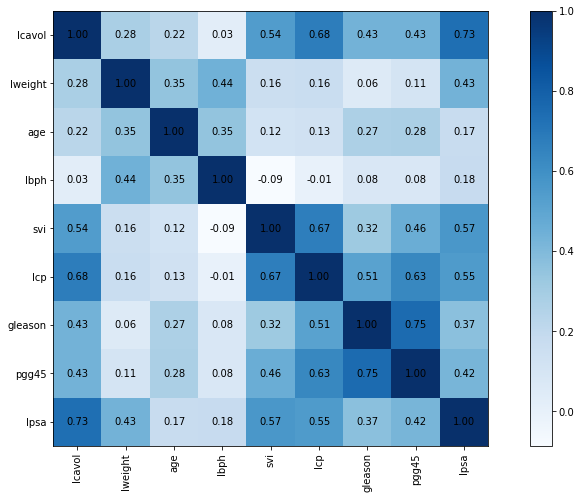

In [4]:
heatmap_data = prostate.loc[:, prostate.columns!="train"]
corr = heatmap_data.corr()
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
plt.imshow(corr, cmap='Blues', interpolation='nearest')
plt.colorbar()
labels = heatmap_data.columns.tolist()
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels,rotation=90, fontsize=10)
ax.set_yticklabels(labels,fontsize=10)

for i in range(len(corr)):
    for j in range(len(corr)):
        text = ax.text(j, i,  matplotlib.ticker.StrMethodFormatter("{x:.2f}")(
            corr.iloc[i, j]),
            ha="center", va="center", color="black")
        
plt.show()

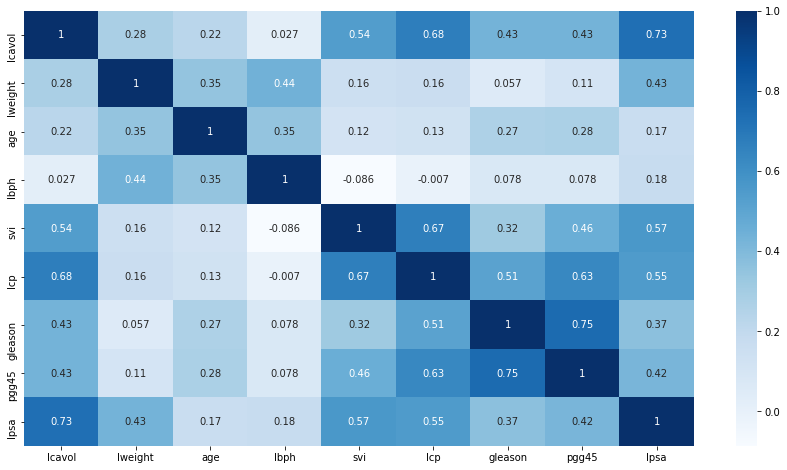

In [5]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

In [6]:
np.cov(heatmap_data)

array([[276.51149792, 320.29943026, 392.65072796, ..., 267.72763278,
        299.72905601, 344.67607564],
       [320.29943026, 371.17473029, 455.15596882, ..., 310.35061941,
        348.03423377, 399.84044749],
       [392.65072796, 455.15596882, 602.47558036, ..., 397.89236434,
        597.12815297, 529.09237726],
       ...,
       [267.72763278, 310.35061941, 397.89236434, ..., 268.96694786,
        358.34893352, 351.80910234],
       [299.72905601, 348.03423377, 597.12815297, ..., 358.34893352,
        984.11162689, 524.57489002],
       [344.67607564, 399.84044749, 529.09237726, ..., 351.80910234,
        524.57489002, 467.32385078]])

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

[1.3795858731891253, 0.9248916376349593, 0.6962854899503435, 0.6172386488220023, 0.6772141876165387, 0.6602449006455746, 0.7461934800608266, 0.7819454155340702, 0.7485111941838746, 0.7447805977158086, 0.7438203874114898, 0.7049888350540215, 0.7072512454217635, 0.6648079566911367, 0.6845543932253605]


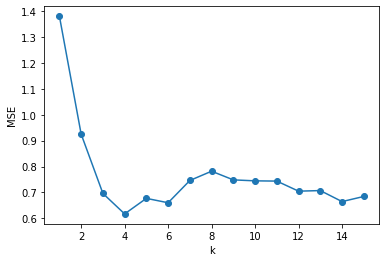

In [8]:
prostate_train = prostate.loc[prostate['train'] == 1]
prostate_test = prostate.loc[prostate['train'] == 0]
X_train = prostate_train.filter(['lcavol','lweight','age','lbph'], axis=1)
y_train = prostate_train.filter(['lpsa'], axis=1)
X_test = prostate_test.filter(['lcavol','lweight','age','lbph'], axis=1)
y_test = prostate_test.filter(['lpsa'], axis=1)
X_train_scaled = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = preprocessing.StandardScaler().fit(X_test).transform(X_test)

MSE = [0] * 15
for k in range(1, 16):
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    MSE[k-1] = mean_squared_error(y_test, y_pred)
print(MSE)
fig, ax = plt.subplots()
plt.xlabel('k')
plt.ylabel('MSE')
plt.plot(range(1, 16), MSE)
plt.scatter(range(1, 16), MSE)
plt.show()

[0.7433522262683393, 0.739592252879116, 0.7596672820757545, 0.6060662588271178, 0.5849221313421888, 0.5938643566017657, 0.5394890865100899, 0.5674551332736413, 0.5743859035076675, 0.52299408731473, 0.49252653830215126, 0.5104990969609774, 0.49793372395081065, 0.5032816821592202, 0.49897662480281385]


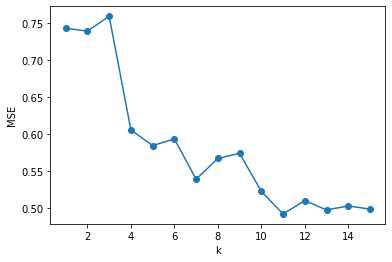

In [9]:
prostate_train = prostate.loc[prostate['train'] == 1]
prostate_test = prostate.loc[prostate['train'] == 0]
X_train = prostate_train.filter(['lcavol','lweight','svi','lcp','pgg45'], axis=1)
y_train = prostate_train.filter(['lpsa'], axis=1)
X_test = prostate_test.filter(['lcavol','lweight','svi','lcp','pgg45'], axis=1)
y_test = prostate_test.filter(['lpsa'], axis=1)
X_train_scaled = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = preprocessing.StandardScaler().fit(X_test).transform(X_test)

MSE = [0] * 15
for k in range(1, 16):
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    MSE[k-1] = mean_squared_error(y_test, y_pred)
print(MSE)
fig, ax = plt.subplots()
plt.xlabel('k')
plt.ylabel('MSE')
plt.plot(range(1, 16), MSE)
plt.scatter(range(1, 16), MSE)
plt.show()

[0.7433522262683393, 0.739592252879116, 0.7596672820757545, 0.6060662588271178, 0.5849221313421888, 0.5938643566017657, 0.5394890865100899, 0.5674551332736413, 0.5743859035076675, 0.52299408731473, 0.49252653830215126, 0.5104990969609774, 0.49793372395081065, 0.5032816821592202, 0.49897662480281385]


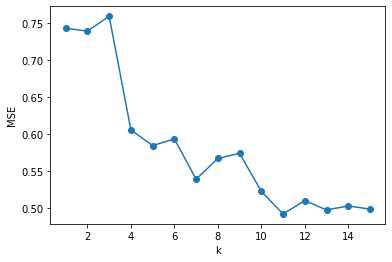

In [10]:
prostate_train = prostate.loc[prostate['train'] == 1]
prostate_test = prostate.loc[prostate['train'] == 0]
X_train = prostate_train.filter(['lcavol','lweight','svi','lcp','pgg45'], axis=1)
y_train = prostate_train.filter(['lpsa'], axis=1)
X_test = prostate_test.filter(['lcavol','lweight','svi','lcp','pgg45'], axis=1)
y_test = prostate_test.filter(['lpsa'], axis=1)
X_train_scaled = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = preprocessing.StandardScaler().fit(X_test).transform(X_test)

MSE = [0] * 15
for k in range(1, 16):
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    MSE[k-1] = mean_squared_error(y_test, y_pred)
print(MSE)
fig, ax = plt.subplots()
plt.xlabel('k')
plt.ylabel('MSE')
plt.plot(range(1, 16), MSE)
plt.scatter(range(1, 16), MSE)
plt.show()

[0.5871969319274309, 0.6062947151669497, 0.5814948288027609, 0.6626732820664183, 0.5456121421526678, 0.4942848234468797, 0.5493889109528072, 0.5430087667692085, 0.5082865515900054, 0.49518990285322323, 0.48976133919837034, 0.48530666471432454, 0.48679028492622706, 0.5111275789403547, 0.5004274952365573]


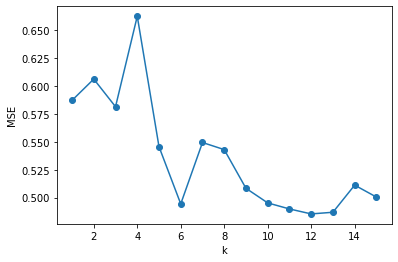

In [11]:
prostate_train = prostate.loc[prostate['train'] == 1]
prostate_test = prostate.loc[prostate['train'] == 0]
X_train = prostate_train.filter(['lcavol','lweight','svi'], axis=1)
y_train = prostate_train.filter(['lpsa'], axis=1)
X_test = prostate_test.filter(['lcavol','lweight','svi'], axis=1)
y_test = prostate_test.filter(['lpsa'], axis=1)
X_train_scaled = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = preprocessing.StandardScaler().fit(X_test).transform(X_test)

MSE = [0] * 15
for k in range(1, 16):
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    MSE[k-1] = mean_squared_error(y_test, y_pred)
print(MSE)
fig, ax = plt.subplots()
plt.xlabel('k')
plt.ylabel('MSE')
plt.plot(range(1, 16), MSE)
plt.scatter(range(1, 16), MSE)
plt.show()

[1.1066410001813776, 0.7583573454212125, 0.6371105441626316, 0.7045085893843428, 0.7340338153415715, 0.7197418462708194, 0.7043461946331295, 0.6564175834058068, 0.5800090013101383, 0.5421521217919327, 0.5316741918693446, 0.5488074048016549, 0.5387374292222655, 0.5346202721683591, 0.5249110264006559]


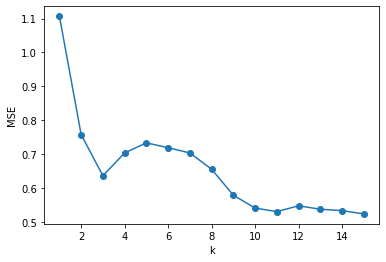

In [12]:
prostate_train = prostate.loc[prostate['train'] == 1]
prostate_test = prostate.loc[prostate['train'] == 0]
X_train = prostate_train.filter(['lcavol','svi', 'lcp'], axis=1)
y_train = prostate_train.filter(['lpsa'], axis=1)
X_test = prostate_test.filter(['lcavol','svi', 'lcp'], axis=1)
y_test = prostate_test.filter(['lpsa'], axis=1)
X_train_scaled = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = preprocessing.StandardScaler().fit(X_test).transform(X_test)

MSE = [0] * 15
for k in range(1, 16):
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    MSE[k-1] = mean_squared_error(y_test, y_pred)
print(MSE)
fig, ax = plt.subplots()
plt.xlabel('k')
plt.ylabel('MSE')
plt.plot(range(1, 16), MSE)
plt.scatter(range(1, 16), MSE)
plt.show()

[0.8248375116334749, 0.7694971981558925, 0.7139217378941102, 0.7267679306403395, 0.6854928535337882, 0.6566377413551777, 0.6084534670779784, 0.5553617608845806, 0.5378875665073749, 0.5019859089111028, 0.5062604836042687, 0.5231334306776628, 0.47911979707572616, 0.4611129984657627, 0.4700730599326243]


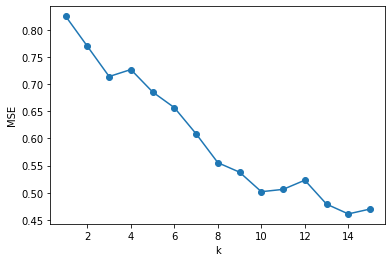

In [13]:
prostate_train = prostate.loc[prostate['train'] == 1]
prostate_test = prostate.loc[prostate['train'] == 0]
X_train = prostate_train.filter(['lcavol','svi', 'pgg45'], axis=1)
y_train = prostate_train.filter(['lpsa'], axis=1)
X_test = prostate_test.filter(['lcavol','svi', 'pgg45'], axis=1)
y_test = prostate_test.filter(['lpsa'], axis=1)
X_train_scaled = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = preprocessing.StandardScaler().fit(X_test).transform(X_test)

MSE = [0] * 15
for k in range(1, 16):
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    MSE[k-1] = mean_squared_error(y_test, y_pred)
print(MSE)
fig, ax = plt.subplots()
plt.xlabel('k')
plt.ylabel('MSE')
plt.plot(range(1, 16), MSE)
plt.scatter(range(1, 16), MSE)
plt.show()